# WHAT NOW? 
# or 
# Data Science Topics I Didn't Cover and Where To Go From Here


## API Example

Let's say we want to extract some data from some api, like the google maps api. You will need several components for this process to work:

1. A library that can handle and process requests to the api (we will use `requests`)
2. A way to convert the data we get into a dictionary (since the json object itself is a string)
3. A way to convert the json object into a dataframe

Lets start by importing what we need:

In [23]:
import requests, urllib
from pandas.io.json import json_normalize
from IPython.display import Image

The example I will show you involves an api that doesnt require any keys (most api's require some authentication, but the google maps one does not).

This api requires that you pass in lat/long coordinates separated by commas and different locations separated by the | symbol (you can pass a whole sequence of locations up to some limit):

In [7]:
locations = '42.974,-81.2053|42.9798,-81.1955'   # this is the lat. and long.
url = 'http://maps.googleapis.com/maps/api/elevation/json?locations='+locations+'&sensor=false' # base url and extension
my_r = requests.get(url)  # send out the info and expect something in return
# this is google data
my_r   # we get a successful response

<Response [200]>

In [8]:
my_r.headers

{'Content-Length': '185', 'X-XSS-Protection': '1; mode=block', 'Content-Encoding': 'gzip', 'Age': '285', 'Expires': 'Sat, 22 Oct 2016 01:52:43 GMT', 'Server': 'mafe', 'Cache-Control': 'public, max-age=86400', 'Date': 'Fri, 21 Oct 2016 01:52:43 GMT', 'X-Frame-Options': 'SAMEORIGIN', 'Content-Type': 'application/json; charset=UTF-8'}

In [9]:
my_r.json

<bound method Response.json of <Response [200]>>

In [10]:
my_r.text

u'{\n   "results" : [\n      {\n         "elevation" : 242.08984375,\n         "location" : {\n            "lat" : 42.974,\n            "lng" : -81.20529999999999\n         },\n         "resolution" : 9.543951988220215\n      },\n      {\n         "elevation" : 252.1887664794922,\n         "location" : {\n            "lat" : 42.9798,\n            "lng" : -81.1955\n         },\n         "resolution" : 9.543951988220215\n      }\n   ],\n   "status" : "OK"\n}\n'

In [4]:
dude = None
# with open("/Users/sergeyfogelson/Downloads/this is my text") as f:
with open("file.txt")
    dude = f.readlines()

IOError: [Errno 2] No such file or directory: '/Users/sergeyfogelson/Downloads/this is my text'

'{\n'

In [11]:
my_r.json()  # this is a set of key-value pairs -- list of nested dictionaries

{u'results': [{u'elevation': 242.08984375,
   u'location': {u'lat': 42.974, u'lng': -81.2053},
   u'resolution': 9.543951988220215},
  {u'elevation': 252.1887664794922,
   u'location': {u'lat': 42.9798, u'lng': -81.1955},
   u'resolution': 9.543951988220215}],
 u'status': u'OK'}

In [12]:
my_r.json().keys()  # way of getting at those results

[u'status', u'results']

In [13]:
my_r.json()["results"]

[{u'elevation': 242.08984375,
  u'location': {u'lat': 42.974, u'lng': -81.2053},
  u'resolution': 9.543951988220215},
 {u'elevation': 252.1887664794922,
  u'location': {u'lat': 42.9798, u'lng': -81.1955},
  u'resolution': 9.543951988220215}]

In [14]:
json_normalize(my_r.json()["results"])  # attempts to read the json object and turn it into a dataframe

,elevation,location.lat,location.lng,resolution
0,242.089844,42.9740,-81.2053,9.543952
1,252.188766,42.9798,-81.1955,9.543952


## Basic Scraping Using BeautifulSoup

BeautifulSoup is a web scraping library that allows you to parse webpages and extract useful data from html (the format in which all webpages are displayed on the web).

Let's use `BeautifulSoup` on an example website (the reddit front page):

In [15]:
from bs4 import BeautifulSoup    # the library is called bs4

First, we request the webpage and extract the content:

In [17]:
a_website = requests.get("http://google.com")  
data = BeautifulSoup(a_website.content)    # a_website is the request object
# We create a beautifulsoup object

Let's take a look at what our data is:

In [18]:
data

<!DOCTYPE html>\n<html itemscope="" itemtype="http://schema.org/WebPage" lang="en"><head><meta content="Search the world's information, including webpages, images, videos and more. Google has many special features to help you find exactly what you're looking for." name="description"/><meta content="noodp" name="robots"/><meta content="text/html; charset=unicode-escape" http-equiv="Content-Type"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>Google</title><script>(function(){window.google={kEI:'uXcJWKa-A9jGjwP47qXoCQ',kEXPI:'18168,1351634,1351828,1351901,3700278,3700400,4029815,4031109,4032678,4036527,4038012,4039268,4043492,4045841,4048347,4052811,4054590,4064904,4065786,4067247,4067860,4068550,4069839,4069841,4070327,4072288,4072364,4072602,4072705,4072774,4073405,4073914,4073959,4074596,4074684,4074809,4076096,4076930,4076999,4077221,4077298,4078407,4078430,4078438,4078454,4078457,4078459,4078763,4079055,4079105,4079155,4079388,

In [19]:
link_list = data.find_all('a')

The data is the raw html from the website we just obtained. Now, what if we could extract specific things from that html, like all of the other webpages it links:

In [20]:
for links in data.find_all('a'):
    print (links.get('href'))   # it finds the links for us

http://www.google.com/imghp?hl=en&tab=wi
http://maps.google.com/maps?hl=en&tab=wl
https://play.google.com/?hl=en&tab=w8
http://www.youtube.com/?tab=w1
http://news.google.com/nwshp?hl=en&tab=wn
https://mail.google.com/mail/?tab=wm
https://drive.google.com/?tab=wo
https://www.google.com/intl/en/options/
http://www.google.com/history/optout?hl=en
/preferences?hl=en
https://accounts.google.com/ServiceLogin?hl=en&passive=true&continue=http://www.google.com/
/advanced_search?hl=en&authuser=0
/language_tools?hl=en&authuser=0
https://www.google.com/url?q=http://madeby.google.com/phone/%3Futm_source%3Dhp%26utm_medium%3DHPP_link%26utm_term%3Dall%26utm_campaign%3Doo_ph_pmos:os_enus&source=hpp&id=19000911&ct=3&usg=AFQjCNFxFOh5WT54LsCYcHKLnGb06eP6XA&sa=X&ved=0ahUKEwjm_s245-rPAhVY42MKHXh3CZ0Q8IcBCAU
/intl/en/ads/
/services/
https://plus.google.com/116899029375914044550
/intl/en/about.html
/intl/en/policies/privacy/
/intl/en/policies/terms/


In [21]:
data.body.find_all("a")

[<a class="gb1" href="http://www.google.com/imghp?hl=en&amp;tab=wi">Images</a>,
 <a class="gb1" href="http://maps.google.com/maps?hl=en&amp;tab=wl">Maps</a>,
 <a class="gb1" href="https://play.google.com/?hl=en&amp;tab=w8">Play</a>,
 <a class="gb1" href="http://www.youtube.com/?tab=w1">YouTube</a>,
 <a class="gb1" href="http://news.google.com/nwshp?hl=en&amp;tab=wn">News</a>,
 <a class="gb1" href="https://mail.google.com/mail/?tab=wm">Gmail</a>,
 <a class="gb1" href="https://drive.google.com/?tab=wo">Drive</a>,
 <a class="gb1" href="https://www.google.com/intl/en/options/" style="text-decoration:none"><u>More</u> \xbb</a>,
 <a class="gb4" href="http://www.google.com/history/optout?hl=en">Web History</a>,
 <a class="gb4" href="/preferences?hl=en">Settings</a>,
 <a class="gb4" href="https://accounts.google.com/ServiceLogin?hl=en&amp;passive=true&amp;continue=http://www.google.com/" id="gb_70" target="_top">Sign in</a>,
 <a href="/advanced_search?hl=en&amp;authuser=0">Advanced search</a>,

## Recommendation Engines (or Recommendation Systems)

![recommendation engine example](../images/recommendation_engine.png)

### Problem: How can we recommend the "most useful" or "most likely to be consumed and enjoyed" items (books/movies/songs/media/clothing/investment products/etc.) to people?

### 2 Basic Types of Recommendation Engines:

### **Content-based:** Use the properties of items to recommend "similar" items (PANDORA DOES THIS)

### **Collaborative:** Use the user's ratings on items and the ratings of others on those same items to recommend other items that "similar" users have also given high ratings (AMAZON/NETFLIX DO THIS)

### Are there Python libraries for this?

### [Turi](https://turi.com/index.html) has a really easy to use recommendation engine module, but its NOT FREE (BOO) AND WAS ALSO RECENTLY ACQUIRED BY APPLE
### In general, recommenders are built at scale using other languages (Python has pretty terrible support for recommendation engines/systems)

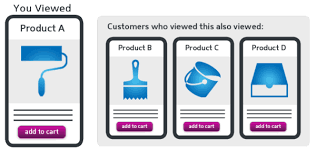

In [26]:
Image(filename = "../images/recommendation_engine.png")

## Neural Networks and Deep Learning

#### [A good introduction](http://neuralnetworksanddeeplearning.com/index.html)

### What is it?

### A really fancy supervised classification/regression method

![artificial neural network example](../images/artificial_neural_network.png)

### What is it used on? Datasets that are really really big that require learning really really complicated representations:

### Pictures/Videos, Text:

![facial recognition deep learning example](../images/calista-deepface.png)

### What is it used for? Making object detection and labeling problems/classifying and rating text (sentiment analysis), low-level content "understanding"

### Are there Python libraries for this?

### [tensorflow](https://www.tensorflow.org) is google's new deep learning package. It just came out but everyone is going bonkers over it because GOOGLE.
### [theano](http://deeplearning.net/software/theano/) this is much more established, works very well with both your CPU and your graphics card (whaaaaat??)
### [keras](http://keras.io) is another Python library that you can use to build deep learning models and hook into either theano or tensorflow. 

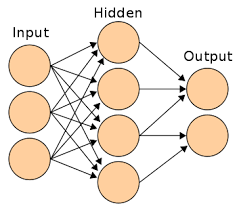

In [24]:
Image(filename="../images/artificial_neural_network.png")

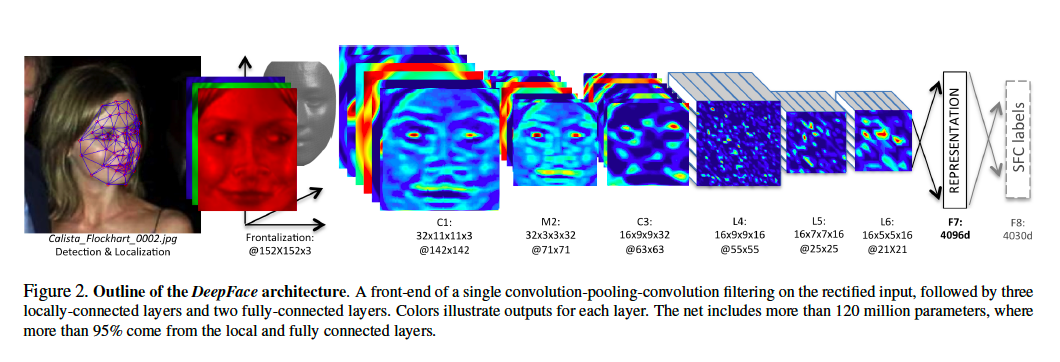

In [25]:
Image(filename="../images/calista-deepface.png")

## Natural Language Processing

### How can I use machine learning when I have freeform text instead of a matrix with rows and columns? How can I cluster texts? How can I try to model useful things from text generally?

### Are there Python libraries for this?
### [nltk](http://www.nltk.org/) is the grandaddy NLP library in Python, but its kinda fallen behind a bit
### [spacy](https://spacy.io/) is a newer, more modern NLP library
### [gensim](https://radimrehurek.com/gensim/index.html) is a very cool new library that allows you to learn word vector representations from text (so you can create text topics and other really cool stuff)

You can even do some basic NLP transformations in Scikit-learn:

We will go over 2 simple transformations to convert text into vectors:

1. **CountVectorizer**: Really large-scale "One-hot-encoding" across all tokens in the text
2. **TF-IDF**: Term frequency/Inverse Document Frequency - label documents according to the tokens that best distinguish it. Tokens that only appear in this document relative to the other documents in your dataset have high values, tokens that appear frequently across all documents get low values.

**Both of these approaches completely ignore word order and context, simply convert text into a dictionary of values.**

A token can be anything: a word, a character, a continuous group of 2,3,4 words, etc.

In [28]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

In [29]:
some_text = pd.DataFrame([["yowza thats awesome"],["Yowza yowza that is an awesome sauce"]],columns = ["text"])

In [30]:
some_text

,text
0,yowza thats awesome
1,Yowza yowza that is an awesome sauce


## Count Vectorizer

Think of it as large-scale one-hot encoding with some catches:

In [33]:
vectorizer = CountVectorizer(ngram_range=(1,6))#stop_words="english",stop_words="english")
transformed_text = vectorizer.fit_transform(some_text.text)

In [34]:
pd.DataFrame(transformed_text.todense(),columns =vectorizer.get_feature_names())

,an,an awesome,an awesome sauce,awesome,awesome sauce,is,is an,is an awesome,is an awesome sauce,sauce,...,yowza that is an,yowza that is an awesome,yowza that is an awesome sauce,yowza thats,yowza thats awesome,yowza yowza,yowza yowza that,yowza yowza that is,yowza yowza that is an,yowza yowza that is an awesome
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,1,1,1,1,1


In [36]:
vectorized_counter.get_feature_names()

NameError: name 'vectorized_counter' is not defined

## TfidfVectorizer

- This computes "relative frequency" that a word appears in a document compared to its frequency across all documents
- Much more useful than "term frequency" for identifying "important" words in each document (high frequency in that document, low frequency in other documents). A term that appears across all documents is incredibly uninformative, a term that appears 
- Commonly used for search engine scoring, text summarization, document clustering until ~2013-2014.

In [37]:
vect = TfidfVectorizer(ngram_range=(1,6))#
pd.DataFrame(vect.fit_transform(some_text.text).toarray(), columns=vect.get_feature_names())

,an,an awesome,an awesome sauce,awesome,awesome sauce,is,is an,is an awesome,is an awesome sauce,sauce,...,yowza that is an,yowza that is an awesome,yowza that is an awesome sauce,yowza thats,yowza thats awesome,yowza yowza,yowza yowza that,yowza yowza that is,yowza yowza that is an,yowza yowza that is an awesome
0,0.000000,0.000000,0.000000,0.317800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.446656,0.446656,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.194143,0.194143,0.194143,0.138134,0.194143,0.194143,0.194143,0.194143,0.194143,0.194143,...,0.194143,0.194143,0.194143,0.000000,0.000000,0.194143,0.194143,0.194143,0.194143,0.194143


## BIG DATA

### Problem: Data Science is great and all on my little laptop, but can it scale to billions/trillions/septillions of examples?

## YES! JUST ADD BIG DATA

![big data](../images/big_data.jpg)

### What this really means is, use api's that can scale across many many interconnected computers (servers)

### Can you BIG DATA in Python?

### [Spark](http://spark.apache.org) has a Python api. It's a big data framework (currently the hottest big data framework) that takes many of the algorithms and approaches we learned (data analysis, exploration, etc.) and scales them to work across many computers (DataFrames are implemented in Spark, so is Logistic Regression/Linear Regression and Random Forests)
### [H20.ai](http://www.h2o.ai/) 

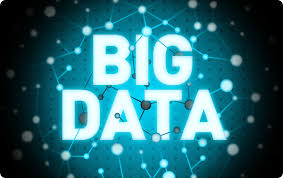

In [38]:
Image(filename="../images/big_data.jpg")

## OK WHAT DO I DO NEXT?

### 1. Use what you've learned (code in Python when you want to use Excel)
### 2. Go a bit deeper into the mathematics behind some of these algorithms (you need to know a little bit of 1st year calculus and a bit more linear algebra) by [reading one of the classic texts on the topic FOR FREE](http://statweb.stanford.edu/~tibs/ElemStatLearn/)
### 3. Learn more! Check [DataTau](http://www.datatau.com) every day. lurk on the [machine learning](https://www.reddit.com/r/MachineLearning/) and [statistics](https://www.reddit.com/r/statistics) subreddits (yes there are useful things on reddit).
### 4. Keep coding. As frequently as you can (or want).
### 5. Keep learning. Check out [metacademy](http://www.metacademy.org/roadmaps/). They have self-directed, free course road maps to LEVEL UP.
### 6. All of you are very capable of doing this. Keep going, because I personally think this stuff is really fun (and these skills will probably inform the future of every freaking industry).